## 展示不同数据扩增的效果

In [7]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import random

In [2]:
raw_dataset = datasets.MNIST(root="./data", train=True, download=False, transform=None)

print("Raw dataset size:", len(raw_dataset))

Raw dataset size: 60000


In [3]:
# 和训练时逻辑一致，但这里是“单个算子 + 基础预处理”的展示版本
base_transform_vis = transforms.Compose([
    transforms.Pad(2),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 每种数据扩增单独一个 transform，方便对比展示
transform_rotation = transforms.Compose([
    transforms.Pad(2),
    transforms.RandomRotation(degrees=15),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

transform_translate = transforms.Compose([
    transforms.Pad(2),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

transform_perspective = transforms.Compose([
    transforms.Pad(2),
    transforms.RandomPerspective(distortion_scale=0.2, p=1.0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

transform_erasing = transforms.Compose([
    transforms.Pad(2),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    transforms.RandomErasing(p=1.0, scale=(0.02, 0.15), ratio=(0.3, 3.3)),
])

aug_dict = {
    "original (no aug)": base_transform_vis,
    "rotation": transform_rotation,
    "translation": transform_translate,
    "perspective": transform_perspective,
    "erasing": transform_erasing,
}

In [4]:
import torch

# 反标准化，方便把图像还原成可视化形式
inv_normalize = transforms.Normalize(
    mean=[-0.1307 / 0.3081],
    std=[1.0 / 0.3081]
)

def show_tensor_image(t, title=None):
    # t: [1, H, W]，MNIST 是单通道
    t = inv_normalize(t)           # 反标准化
    img = t.squeeze(0).cpu().numpy()
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    if title:
        plt.title(title)

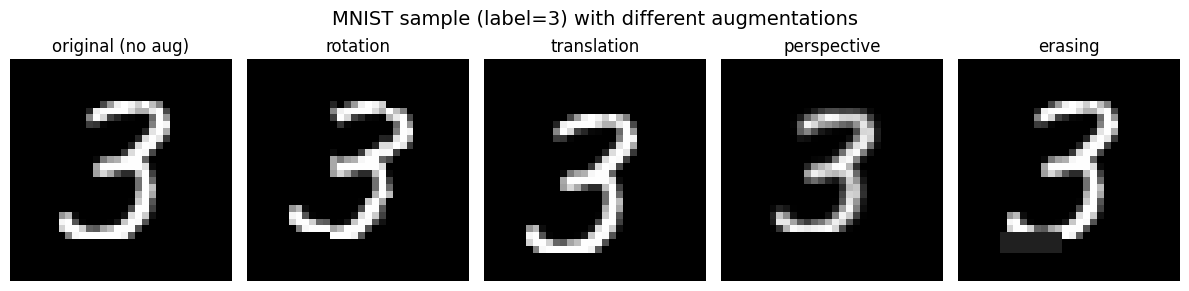

In [26]:
idx = random.randint(0, len(raw_dataset)-1)
pil_img, label = raw_dataset[idx]

plt.figure(figsize=(12, 3))

for i, (name, tf) in enumerate(aug_dict.items()):
    # 对同一张原始 PIL 图像分别应用不同的 transform
    img_t = tf(pil_img)   # [1, 32, 32]

    plt.subplot(1, len(aug_dict), i+1)
    show_tensor_image(img_t, title=name)

plt.suptitle(f"MNIST sample (label={label}) with different augmentations", fontsize=14)
plt.tight_layout()
plt.show()